
Линейная регрессия на TensorFlow
Блок 1: Импорт библиотек


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline


Блок 2: Генерация синтетических данных

Обучающих примеров: 160, Тестовых: 40


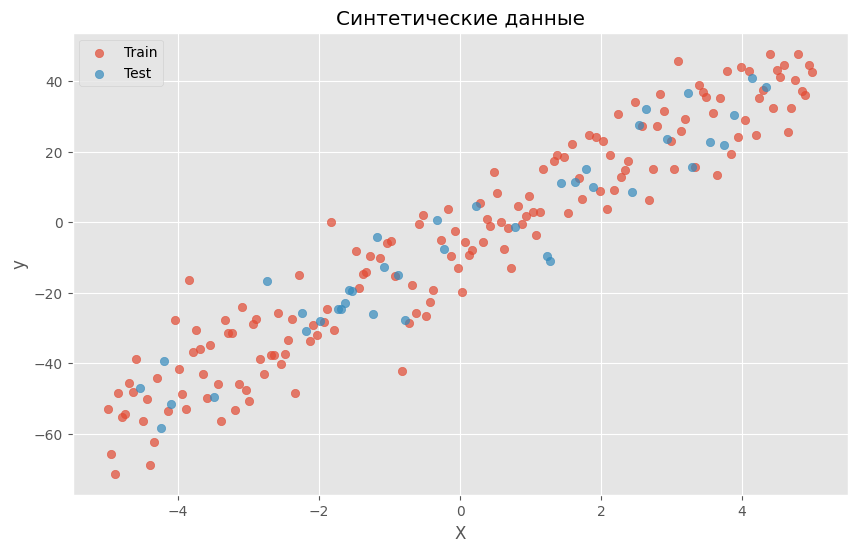

In [3]:



def generate_data(n_points=100):
    """Генерация данных для линейной регрессии"""
    X = np.linspace(-5, 5, n_points)
    y = 10 * X - 7 + np.random.randn(n_points) * 10
    
    X_train, X_test, y_train, y_test = train_test_split(
        X.reshape(-1, 1), y, test_size=0.2, random_state=42
    )
    
    print(f'Обучающих примеров: {len(X_train)}, Тестовых: {len(X_test)}')
    return X_train, X_test, y_train, y_test

# Генерация и визуализация
X_train, X_test, y_train, y_test = generate_data(200)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Train', alpha=0.7)
plt.scatter(X_test, y_test, label='Test', alpha=0.7)
plt.title("Синтетические данные")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Блок 3: Реализация модели на TensorFlow

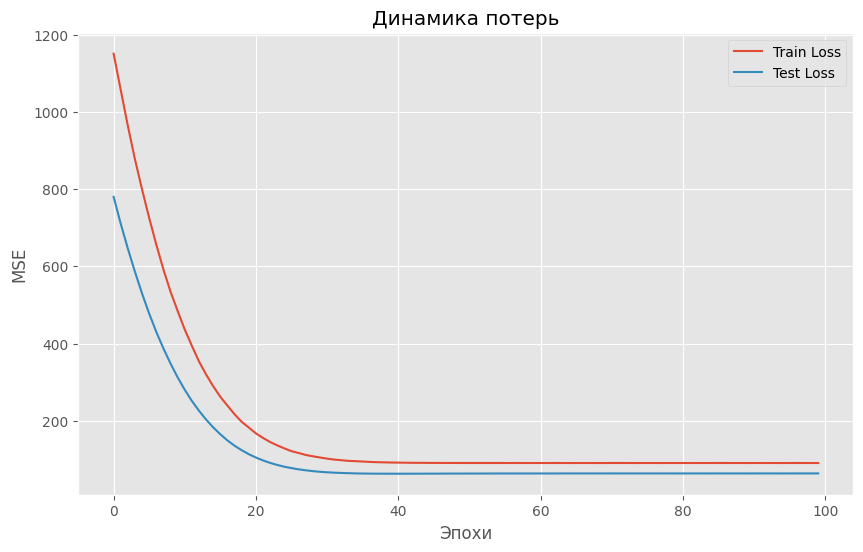

In [4]:

class LinearModel(tf.keras.Model):
    """Кастомная модель линейной регрессии"""
    def __init__(self):
        super(LinearModel, self).__init__()
        self.dense = tf.keras.layers.Dense(1, activation=None)
        
    def call(self, inputs):
        return self.dense(inputs)

model = LinearModel()
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mse')

# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=0
)

# Визуализация обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Динамика потерь')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()

Блок 4: Анализ результатов

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Результаты:
Train MSE: 90.82
Test MSE: 63.85


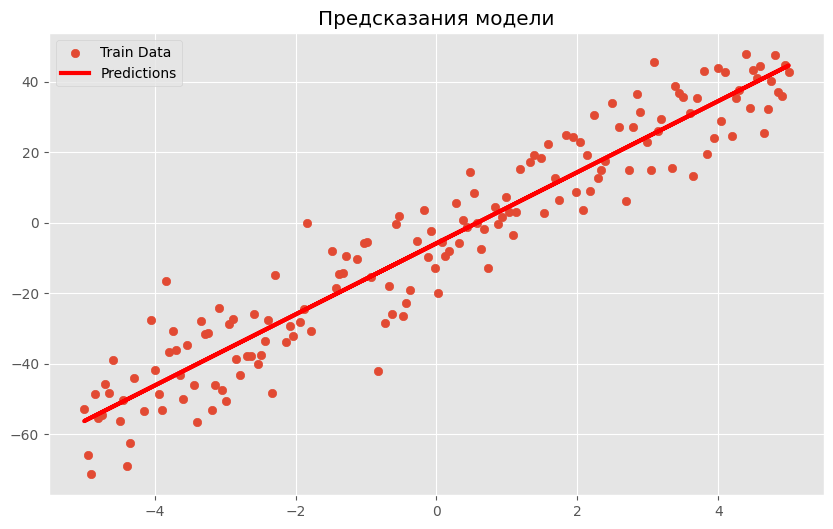

In [5]:

# Предсказания и метрики
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

print("Результаты:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Train Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=3, label='Predictions')
plt.title("Предсказания модели")
plt.legend()
plt.show()

Блок 5: Работа с Boston Housing Dataset (исправленная версия)

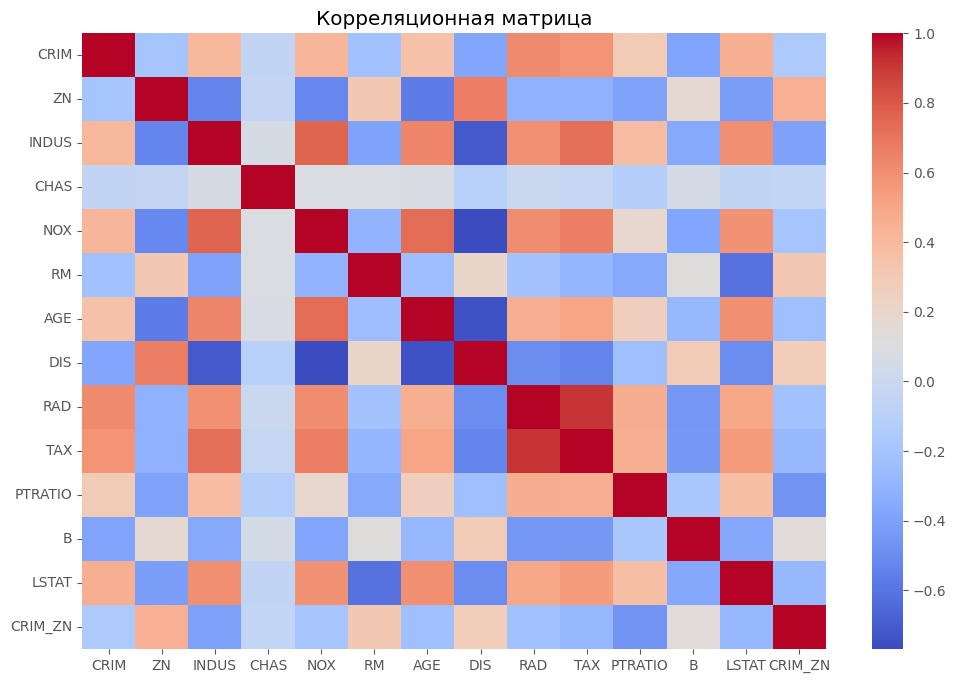

In [6]:

# Альтернативная загрузка данных Boston Housing
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Создание DataFrame с оригинальными названиями признаков
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
X = pd.DataFrame(data, columns=feature_names)
y = target

# Инжиниринг признаков
X['CRIM_ZN'] = X['CRIM'] * X['ZN']

# Визуализация корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()




Блок 6: Предобработка данных


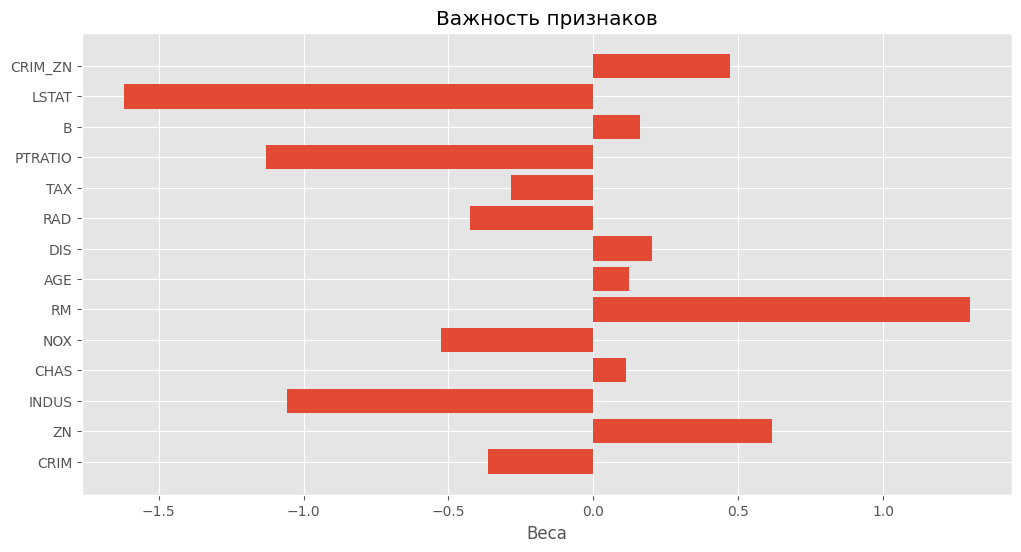

In [7]:


# Нормализация
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
model = LinearModel()
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=200, verbose=0)

# Важность признаков
plt.figure(figsize=(12, 6))
plt.barh(X.columns, model.dense.weights[0].numpy().flatten())
plt.title("Важность признаков")
plt.xlabel("Веса")
plt.show()


Блок 7: Регуляризация

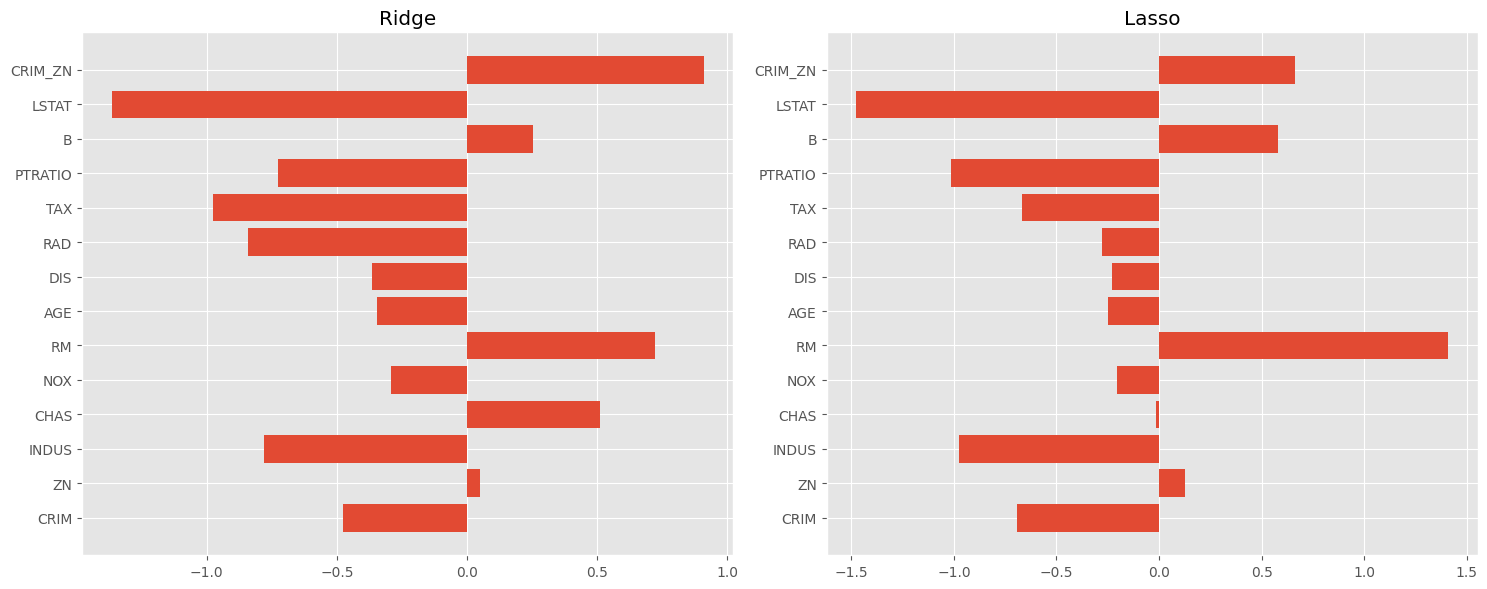

In [8]:


# Ridge регрессия
ridge_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.1))
])
ridge_model.compile(optimizer='adam', loss='mse')
ridge_model.fit(X_train_scaled, y_train, epochs=200, verbose=0)

# Lasso регрессия
lasso_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.1))
])
lasso_model.compile(optimizer='adam', loss='mse')
lasso_model.fit(X_train_scaled, y_train, epochs=200, verbose=0)

# Сравнение весов
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(X.columns, ridge_model.layers[0].weights[0].numpy().flatten())
plt.title("Ridge")
plt.subplot(1, 2, 2)
plt.barh(X.columns, lasso_model.layers[0].weights[0].numpy().flatten())
plt.title("Lasso")
plt.tight_layout()
plt.show()


Блок 8: Классификация на банковских данных 

In [9]:


# Загрузка и предобработка данных
bank_data = pd.read_csv('/home/admin/Документы/!PLEHA/LAB /II_LABS/LABS_II/LABII/bank.csv', sep=';')

# Конвертация категориальных признаков
bank_data = pd.get_dummies(bank_data, drop_first=True)

# Преобразование всех данных в числовой формат
X = bank_data.drop('y_yes', axis=1).astype('float32')
y = bank_data['y_yes'].astype('float32')

# Разделение данных с правильными типами
X_train, X_test, y_train, y_test = train_test_split(
    X.values,  # Явное преобразование в numpy array
    y.values, 
    test_size=0.2,
    random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель классификации
classification_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

classification_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Обучение с масштабированными данными
history = classification_model.fit(
    X_train_scaled, 
    y_train,
    epochs=50,
    validation_data=(X_test_scaled, y_test),
    verbose=0
)




Визуализация результата

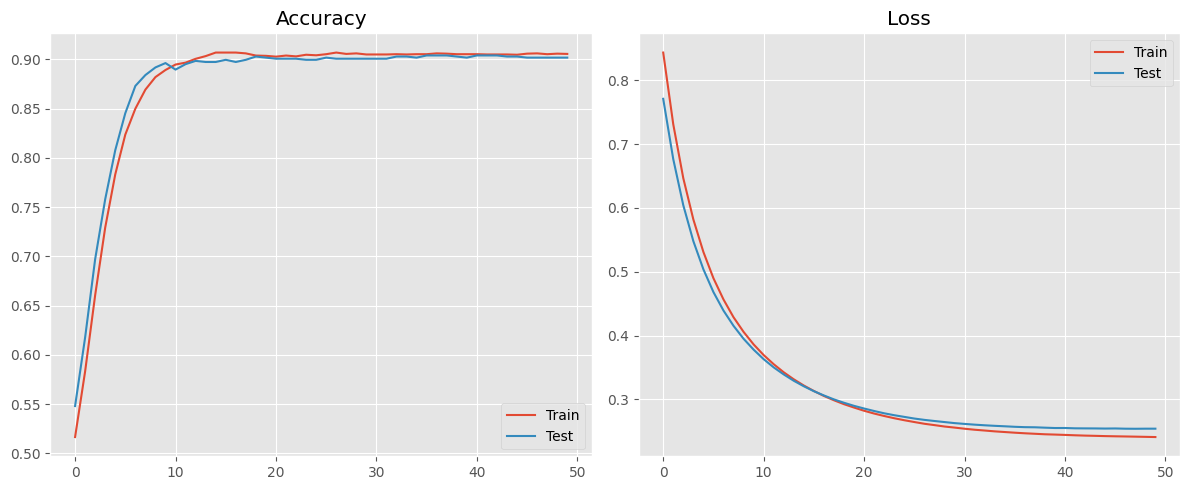

In [10]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
